# Test files for Recurrent Neural Network

In [16]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

### Loading data

In [17]:
from load_data import load_and_transform_data

In [18]:
X_train, y_train, X_val, y_val, X_test, y_test = load_and_transform_data(SEED=42)

Dataset already exists at: chest_xray_data

Dataset ready at: c:\Users\eirik\Desktop\FYSSTK3155_Dataprocessing_and_MachineLearning\Project3_FYSSTK3155-4155\Code\chest_xray_data
Dataset already exists at: chest_xray_data_split



Loading test: 100%|██████████| 587/587 [00:05<00:00, 106.35it/s]


Train: (4684, 480, 480), Val: (585, 480, 480), Test: (587, 480, 480)


In [19]:
# Check shape of subsets
print(f"X train shape:\t", X_train.shape)
print(f"y train shape:\t", y_train.shape)
print(f"X val shape:\t", X_val.shape)
print(f"y val shape:\t", y_val.shape)
print(f"X test shape:\t", X_test.shape)
print(f"y test shape:\t", y_test.shape)

X train shape:	 (4684, 480, 480)
y train shape:	 (4684,)
X val shape:	 (585, 480, 480)
y val shape:	 (585,)
X test shape:	 (587, 480, 480)
y test shape:	 (587,)


### Initial testing for RNN, LSTM and GRU

In [ ]:
RNN = keras.Sequential()                          # Create a base sequential model
RNN.add(keras.Input(shape=(480, 480)))            # Set the input shape
RNN.add(layers.SimpleRNN(units=240))      # Add a simple RNN layer
RNN.add(layers.Dense(units=1, activation="sigmoid")) # Output layer

# Get a summary of model configuration
RNN.summary()

In [ ]:
LSTM = keras.Sequential()                          # Create a base sequential model
LSTM.add(keras.Input(shape=(480, 480)))            # Set the input shape
LSTM.add(layers.LSTM(units=240))      # Add a LSTM layer
LSTM.add(layers.Dense(units=1, activation="sigmoid")) # Output layer

# Get a summary of model configuration
LSTM.summary()

In [21]:
GRU = keras.Sequential()                          # Create a base sequential model
GRU.add(keras.Input(shape=(480, 480)))            # Set the input shape
GRU.add(layers.GRU(units=240))      # Add a GRU layer
GRU.add(layers.Dense(units=1, activation="sigmoid")) # Output layer

# Get a summary of model configuration
GRU.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 240)            │       519,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,081 (1.98 MB)

 Trainable params: 520,081 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [ ]:
batch_size = 32
epochs = 10

In [ ]:
RNN.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

RNN_trainer = RNN.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)

RNN_test_loss, RNN_test_acc = RNN.evaluate(X_test, y_test)
print(f'RNN Test Accuracy: {RNN_test_acc}')

In [ ]:
LSTM.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

LSTM_trainer = LSTM.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)

LSTM_test_loss, LSTM_test_acc = LSTM.evaluate(X_test, y_test)
print(f'LSTM Test Accuracy: {LSTM_test_acc}')

In [24]:
GRU.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

GRU_trainer = GRU.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)

GRU_test_loss, GRU_test_acc = GRU.evaluate(X_test, y_test)
print(f'GRU Test Accuracy: {GRU_test_acc}')

Epoch 1/10
112/147 ━━━━━━━━━━━━━━━━━━━━ 1:38 3s/step - accuracy: 0.6978 - loss: 0.6745

KeyboardInterrupt: 

### Plotting Results

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(RNN_trainer.history['val_accuracy'], label='RNN Val Accuracy')
ax1.plot(LSTM_trainer.history['val_accuracy'], label='LSTM Val Accuracy')
ax1.plot(GRU_trainer.history['val_accuracy'], label='GRU Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(RNN_trainer.history['val_loss'], label='RNN Val Loss')
ax2.plot(LSTM_trainer.history['val_loss'], label='LSTM Val Loss')
ax2.plot(GRU_trainer.history['val_loss'], label='GRU Val Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Model Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
y_pred = RNN.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# 3. Print test metrics
test_loss, test_acc = RNN.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

In [ ]:
y_pred = LSTM.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# 3. Print test metrics
test_loss, test_acc = LSTM.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

In [ ]:
y_pred = GRU.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['NORMAL', 'PNEUMONIA'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# 3. Print test metrics
test_loss, test_acc = GRU.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

## Initial Rough Grid Search

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import itertools
from tqdm import tqdm
import pandas as pd
import os
from load_data import load_and_transform_data

# Speed optimizations
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'


In [ ]:

# Create results directory
os.makedirs("CSV results", exist_ok=True)

# Hyperparameters
units = [30, 120, 240, 480]
epochs = [5]
n_layers = [1, 2, 3]
layer_types = [layers.SimpleRNN, layers.GRU]

# Generate all layer configurations
def generate_layer_configs(n_layers, layer_types, units_options):
    configs = []
    
    for layer_type in layer_types:
        if n_layers == 1:
            for u in units_options:
                configs.append({
                    'type': layer_type,
                    'units': (u)
                })
        elif n_layers == 2:
            for i, u1 in enumerate(units_options):
                for u2 in units_options[:i+1]:
                    configs.append({
                        'type': layer_type,
                        'units': (u1, u2)
                    })
        elif n_layers == 3:
            for i, u1 in enumerate(units_options):
                for j, u2 in enumerate(units_options[:i+1]):
                    for u3 in units_options[:j+1]:
                        configs.append({
                            'type': layer_type,
                            'units': (u1, u2, u3)
                        })
    
    return configs

In [8]:
# Load data
from load_data import load_and_transform_data
X_train, y_train, X_val, y_val, X_test, y_test = load_and_transform_data(SEED=42)

Dataset already exists at: chest_xray_data

Dataset ready at: c:\Users\eirik\Desktop\FYSSTK3155_Dataprocessing_and_MachineLearning\Project3_FYSSTK3155-4155\Code\chest_xray_data
Dataset already exists at: chest_xray_data_split



Loading test: 100%|██████████| 587/587 [00:03<00:00, 147.85it/s]


Train: (4684, 480, 480), Val: (585, 480, 480), Test: (587, 480, 480)


In [ ]:
# Calculate total combinations
layer_configs = []
for n_lay in n_layers:
    configs = generate_layer_configs(n_lay, layer_types, units)
    for config in configs:
        layer_configs.append((n_lay, config))

total_combinations = len(epochs) * len(layer_configs)
print(f"Total combinations: {total_combinations}")

# Store results
results1 = []

# Train all models
for idx, (ep, (n_lay, layer_config)) in enumerate(tqdm(
    itertools.product(epochs, layer_configs), 
    total=total_combinations)):
    
    # Clear previous sessions
    tf.keras.backend.clear_session()
    
    # Build model based on layer configuration
    model = keras.Sequential()
    model.add(keras.Input(shape=(480, 480)))
    
    # Add layers with varying units
    layer_type = layer_config['type']
    layer_units = layer_config['units']
    
    for i, u in enumerate(layer_units):
        return_sequences = (i < len(layer_units) - 1)
        model.add(layer_type(units=u, return_sequences=return_sequences))
    
    # Output layer
    model.add(layers.Dense(units=1, activation="sigmoid"))
    
    # Compile
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    trainer = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                       epochs=ep, verbose=0)

    # Get metrics
    val_acc = trainer.history['val_accuracy'][-1]
    val_loss = trainer.history['val_loss'][-1]
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Create readable string
    layer_name = layer_type.__name__
    layer_str = ' -> '.join([f"{layer_name}({u})" for u in layer_units])

    # Store results
    results1.append({
        'n-Layers': n_lay,
        'Layer-Config': layer_str,
        'Units': str(layer_units),
        'n-Epochs': ep,
        'Val Accuracy': val_acc,
        'Val Loss': val_loss,
        'Test Accuracy': test_acc,
        'Test Loss': test_loss
    })
    
    # Save progress
    pd.DataFrame(results1).to_csv("CSV results/GRU_results_rough_temp.csv", index=False)

# Save final results
df_results1 = pd.DataFrame(results1)
df_results1.to_csv("CSV results/GRU_results_rough.csv", index=False)

Total combinations: 68


100%|██████████| 68/68 [26:33:19<00:00, 1405.87s/it]  


Complete! 68 models trained

Top 20:
                        Layer-Config  Val Accuracy  Test Accuracy
59   GRU(480) -> GRU(120) -> GRU(30)      0.933333       0.919932
60  GRU(480) -> GRU(120) -> GRU(120)      0.933333       0.928450
62  GRU(480) -> GRU(240) -> GRU(120)      0.931624       0.913118
56  GRU(240) -> GRU(240) -> GRU(120)      0.924786       0.923339
63  GRU(480) -> GRU(240) -> GRU(240)      0.923077       0.908007
53   GRU(240) -> GRU(120) -> GRU(30)      0.921368       0.914821
22              GRU(240) -> GRU(120)      0.919658       0.919932
67  GRU(480) -> GRU(480) -> GRU(480)      0.919658       0.919932
19               GRU(120) -> GRU(30)      0.917949       0.899489
49    GRU(120) -> GRU(30) -> GRU(30)      0.917949       0.908007
58    GRU(480) -> GRU(30) -> GRU(30)      0.916239       0.909710
50   GRU(120) -> GRU(120) -> GRU(30)      0.914530       0.914821
25              GRU(480) -> GRU(120)      0.911111       0.890971
52    GRU(240) -> GRU(30) -> GRU(30)  

In [ ]:
# Show top 20
top_20 = df_results1.nlargest(20, 'Test Accuracy')
print(f"\nComplete! {len(results1)} models trained")
print("\nTop 20:")
print(top_20[['Layer-Config', 'Val Accuracy', 'Test Accuracy']])


Complete! 68 models trained

Top 20:
                        Layer-Config  Val Accuracy  Test Accuracy
60  GRU(480) -> GRU(120) -> GRU(120)      0.933333       0.928450
56  GRU(240) -> GRU(240) -> GRU(120)      0.924786       0.923339
22              GRU(240) -> GRU(120)      0.919658       0.919932
57  GRU(240) -> GRU(240) -> GRU(240)      0.904274       0.919932
59   GRU(480) -> GRU(120) -> GRU(30)      0.933333       0.919932
67  GRU(480) -> GRU(480) -> GRU(480)      0.919658       0.919932
26              GRU(480) -> GRU(240)      0.907692       0.918228
50   GRU(120) -> GRU(120) -> GRU(30)      0.914530       0.914821
53   GRU(240) -> GRU(120) -> GRU(30)      0.921368       0.914821
61   GRU(480) -> GRU(240) -> GRU(30)      0.904274       0.914821
62  GRU(480) -> GRU(240) -> GRU(120)      0.931624       0.913118
23              GRU(240) -> GRU(240)      0.899145       0.909710
54  GRU(240) -> GRU(120) -> GRU(120)      0.907692       0.909710
58    GRU(480) -> GRU(30) -> GRU(30)  

In [11]:
# Hyperparameters
dropout = [0.0, 0.15, 0.3]
recurrent_dropout = [0.0, 0.15, 0.3]
batch_sizes = [32]
epochs = [5]

# Fixed layer config
fixed_layer_type = layers.GRU
fixed_units = (240, 120)

In [ ]:
# Calculate total combinations
total_combinations = len(dropout) * len(recurrent_dropout) * len(batch_sizes) * len(epochs)
print(f"Total combinations: {total_combinations}")

# Store results
results_dropout = []

# Train all models
for drop, rec_drop, bs, ep in tqdm(itertools.product(dropout, recurrent_dropout, batch_sizes, epochs), 
                                    total=total_combinations):
    
    # Clear previous sessions
    tf.keras.backend.clear_session()
    
    # Build model with fixed architecture
    model = keras.Sequential()
    model.add(keras.Input(shape=(480, 480)))
    
    # Add GRU layers with dropout
    model.add(fixed_layer_type(units=fixed_units[0], dropout=drop, recurrent_dropout=rec_drop, return_sequences=True))
    model.add(fixed_layer_type(units=fixed_units[1], dropout=drop, recurrent_dropout=rec_drop))
    
    # Output layer
    model.add(layers.Dense(units=1, activation="sigmoid"))
    
    # Compile
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
  
    # Train
    trainer = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                       epochs=ep, verbose=0, batch_size=bs)

    # Get metrics
    val_acc = trainer.history['val_accuracy'][-1]
    val_loss = trainer.history['val_loss'][-1]
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0, batch_size=bs)

    # Store results
    results_dropout.append({
        'Layer-Config': 'GRU(240) -> GRU(120)',
        'Dropout': drop,
        'Recurrent-Dropout': rec_drop,
        'Batch-Size': bs,
        'n-Epochs': ep,
        'Val Accuracy': val_acc,
        'Val Loss': val_loss,
        'Test Accuracy': test_acc,
        'Test Loss': test_loss
    })
    
    # Save progress
    pd.DataFrame(results_dropout).to_csv("CSV results/RNN_dropout_results_temp.csv", index=False)

# Save final results
df_results_dropout = pd.DataFrame(results_dropout)
df_results_dropout.to_csv("CSV results/RNN_dropout_results.csv", index=False)

Total combinations: 9


100%|██████████| 9/9 [6:27:20<00:00, 2582.29s/it]  


Complete! 9 models trained

Top 10:
   Dropout  Recurrent-Dropout  Val Accuracy  Test Accuracy
3     0.15               0.00      0.926496       0.904600
4     0.15               0.15      0.917949       0.906303
2     0.00               0.30      0.914530       0.909710
6     0.30               0.00      0.912821       0.908007
1     0.00               0.15      0.909402       0.904600
8     0.30               0.30      0.909402       0.889267
0     0.00               0.00      0.905983       0.918228
7     0.30               0.15      0.895727       0.887564
5     0.15               0.30      0.887179       0.890971


In [13]:
# Show top results
top_10 = df_results_dropout.nlargest(10, 'Test Accuracy')
print(f"\nComplete! {len(results_dropout)} models trained")
print("\nTop 10:")
print(top_10[['Dropout', 'Recurrent-Dropout', 'Val Accuracy', 'Test Accuracy']])


Complete! 9 models trained

Top 10:
   Dropout  Recurrent-Dropout  Val Accuracy  Test Accuracy
0     0.00               0.00      0.905983       0.918228
2     0.00               0.30      0.914530       0.909710
6     0.30               0.00      0.912821       0.908007
4     0.15               0.15      0.917949       0.906303
1     0.00               0.15      0.909402       0.904600
3     0.15               0.00      0.926496       0.904600
5     0.15               0.30      0.887179       0.890971
8     0.30               0.30      0.909402       0.889267
7     0.30               0.15      0.895727       0.887564


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

# Widths in inches from revtex4's layout
columnwidth = 4.375
fig_width = columnwidth
fig_height = columnwidth / 1.618
fig_size = [fig_width, fig_height]

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": [],
    "font.size": 14.0, 
    "axes.labelsize": 14.0,
    "legend.fontsize": 12.0,
    "xtick.labelsize": 12.0,
    "ytick.labelsize": 12.0,
    "figure.figsize": fig_size,
    "savefig.dpi": 300,
})


In [16]:
# Load data
df_architecture = pd.read_csv("CSV results/GRU_results_rough.csv")

# Parse units and layer type
df_architecture['First_Layer_Units'] = df_architecture['Units'].apply(lambda x: eval(x)[0])
df_architecture['Layer_Type'] = df_architecture['Layer-Config'].apply(lambda x: 'GRU' if 'GRU' in x else 'SimpleRNN')


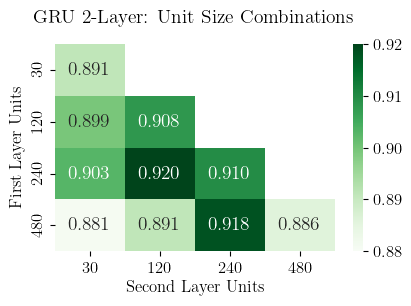

In [ ]:

# Filter only 2-layer GRU configurations
df_gru_2layer = df_architecture[(df_architecture['Layer_Type'] == 'GRU') & 
                                 (df_architecture['n-Layers'] == 2)].copy()

# Parse second layer units
df_gru_2layer['Second_Layer_Units'] = df_gru_2layer['Units'].apply(lambda x: eval(x)[1])

# Create pivot table: First layer units (rows) x Second layer units (columns)
pivot_gru_units = df_gru_2layer.pivot_table(
    values='Test Accuracy',
    index='First_Layer_Units',
    columns='Second_Layer_Units',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(columnwidth, columnwidth*(3/4)))
sns.heatmap(pivot_gru_units, annot=True, fmt='.3f', ax=ax, cmap="Greens",
            vmin=0.88, vmax=0.92)
ax.set_title("GRU 2-Layer: Unit Size Combinations", fontsize=14, pad=15)
ax.set_ylabel("First Layer Units", fontsize=12)
ax.set_xlabel("Second Layer Units", fontsize=12)
plt.tight_layout()
plt.show()


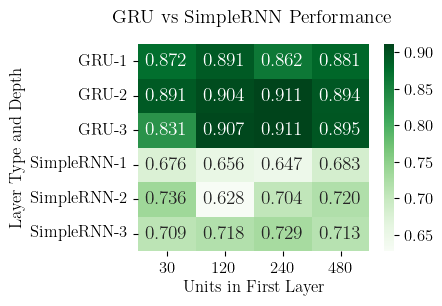

In [ ]:
# ============= PLOT 1: GRU vs SimpleRNN =============
pivot_comparison = df_architecture.pivot_table(
    values='Test Accuracy',
    index=['Layer_Type', 'n-Layers'],
    columns='First_Layer_Units',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(columnwidth*1.05, columnwidth*(3/4)))
sns.heatmap(pivot_comparison, annot=True, fmt='.3f', ax=ax, cmap="Greens")
ax.set_title("GRU vs SimpleRNN Performance", fontsize=14, pad=15)
ax.set_xlabel("Units in First Layer", fontsize=12)
ax.set_ylabel("Layer Type and Depth", fontsize=12)
plt.yticks(rotation=0, va='center')
plt.tight_layout()
plt.show()

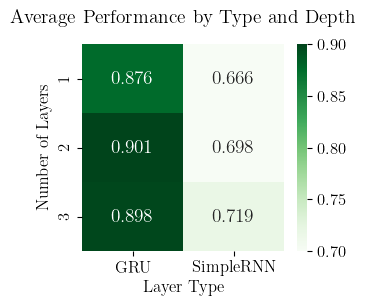

In [19]:

# ============= PLOT 2: Simplified Comparison - Average by Type and Depth =============
summary = df_architecture.groupby(['Layer_Type', 'n-Layers'])['Test Accuracy'].mean().reset_index()
pivot_simple = summary.pivot(index='n-Layers', columns='Layer_Type', values='Test Accuracy')

fig, ax = plt.subplots(figsize=(columnwidth*0.8, columnwidth*(3/4)))
sns.heatmap(pivot_simple, annot=True, fmt='.3f', ax=ax, cmap="Greens",
            vmin=0.7, vmax=0.9)
ax.set_title("Average Performance by Type and Depth", fontsize=14, pad=15)
ax.set_ylabel("Number of Layers", fontsize=12)
ax.set_xlabel("Layer Type", fontsize=12)
plt.tight_layout()
plt.show()


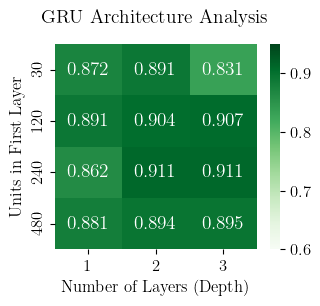

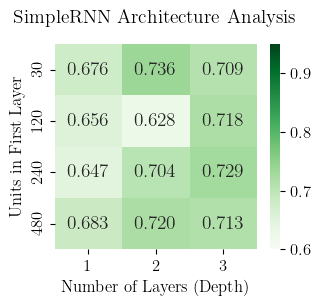

In [20]:

# ============= PLOT 3: Separate Heatmaps for GRU and SimpleRNN =============
for layer_type in ['GRU', 'SimpleRNN']:
    df_subset = df_architecture[df_architecture['Layer_Type'] == layer_type]
    
    pivot = df_subset.pivot_table(
        values='Test Accuracy',
        index='First_Layer_Units',
        columns='n-Layers',
        aggfunc='mean'
    )
    
    fig, ax = plt.subplots(figsize=(columnwidth*0.8, columnwidth*(3/4)))
    sns.heatmap(pivot, annot=True, fmt='.3f', ax=ax, cmap="Greens",
                vmin=0.6, vmax=0.95)
    ax.set_title(f"{layer_type} Architecture Analysis", fontsize=14, pad=15)
    ax.set_ylabel("Units in First Layer", fontsize=12)
    ax.set_xlabel("Number of Layers (Depth)", fontsize=12)
    plt.tight_layout()
    plt.show()

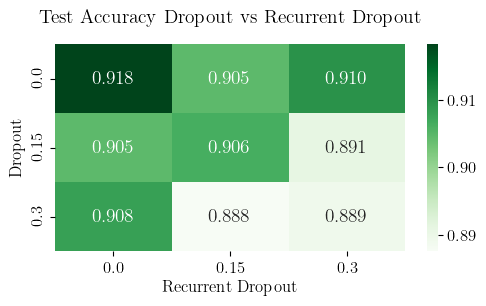

In [26]:
# Load the dropout results
df_dropout = pd.read_csv("CSV results/RNN_dropout_results.csv")

# Create pivot table for heatmap
pivot_dropout = df_dropout.pivot_table(
    values='Test Accuracy',
    index='Dropout',
    columns='Recurrent-Dropout',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(columnwidth*1.2, columnwidth*(3/4)))
sns.heatmap(pivot_dropout, annot=True, fmt='.3f', ax=ax, cmap="Greens")
ax.set_title("Test Accuracy Dropout vs Recurrent Dropout", fontsize=14, pad=15)
ax.set_xlabel("Recurrent Dropout", fontsize=12)
ax.set_ylabel("Dropout", fontsize=12)
plt.tight_layout()
plt.show()